    Script for testing if Emotibit is recieveing artificial pulses generated from LSL.
        The following is tested for data colected with different time interval marker streams
        One stream with intervals of 1500ms
        Another stream of 10000ms (10s) intervals.
    

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot   as plt
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path
%matplotlib qt
sys.path.append(Path(r"C:\Users\ArturoV\Desktop\projects\EmotiBit\emotiBitData\LSL"))

In [51]:
%matplotlib inline

file1=r'..\emotiBitData\LSL\2022-12-14_12-50-35-171609\2022-12-14_12-50-35-171609_TX_TL_LC.csv'#r'C:\Users\ArturoV\Desktop\projects\EmotiBit\emotiBitData\LSL\2022-12-12_16-27-05-140907_TX_TL_LC.csv' #500ms interval data
file2=r'..\emotiBitData\LSL\2022-12-14_12-50-35-171609\2022-12-14_12-50-35-171609_TX_TL_LC.csv' #500ms interval data
file3=r'..\emotiBitData\LSL\2022-12-14_12-50-35-171609\2022-12-14_12-50-35-171609_AX.csv' #500ms interval data
file4=r'..\emotiBitData\LSL\2022-12-14_08-55-09-834278\2022-12-14_08-55-09-834278_TX_LC_LM.csv' #10s interval LSL
file5=r'..\emotiBitData\LSL\2022-12-14_08-55-09-834278\2022-12-14_08-55-09-834278_BV.csv' #10s interval LSL

data1=pd.read_csv(file1,delimiter=",")
data2=pd.read_csv(file2,delimiter=",")
HR=pd.read_csv(file3,delimiter=",")
data4=pd.read_csv(file4,delimiter=",")
HR_data4=pd.read_csv(file5,delimiter=",")

Letsm plot some figures

Text(0.5, 1.0, '10s interval data using LocalTimestamp')

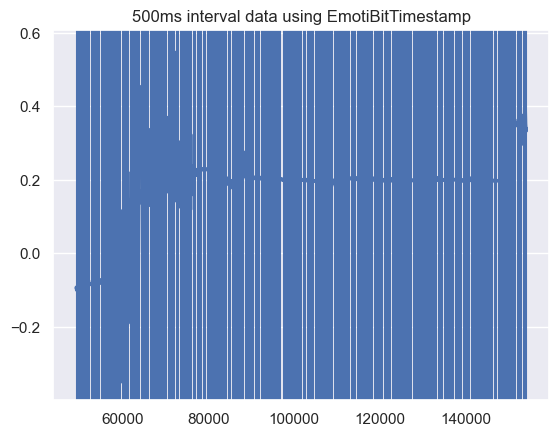

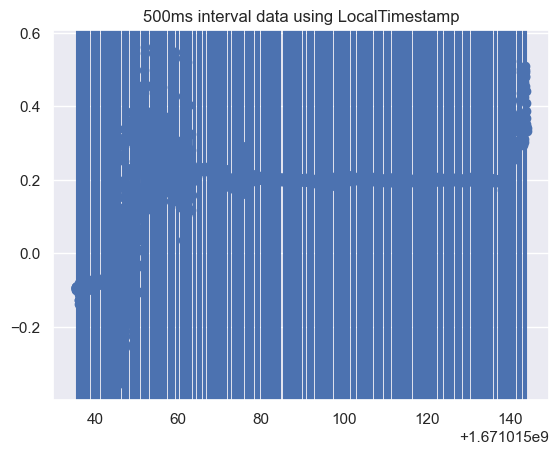

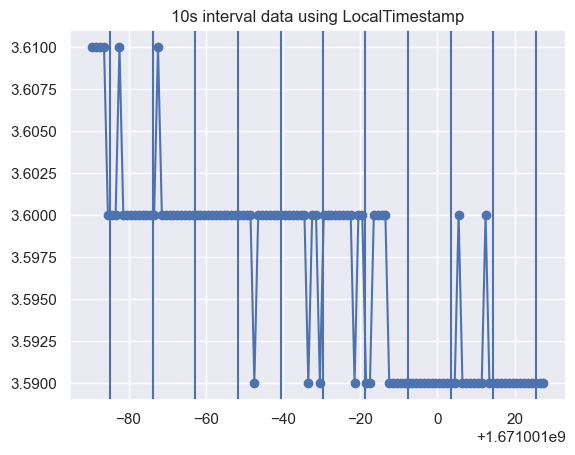

In [52]:
sns.set_theme()
fig,ax = plt.subplots(1,1)
ax.plot(HR['EmotiBitTimestamp'],HR['AX'],'-')
for vline in data1['EmotiBitTimestamp']:
    plt.axvline(vline, color = 'b', label = 'axvline - full height')
ax.set_title('500ms interval data using EmotiBitTimestamp')

fig2,ax2 = plt.subplots(1,1)
ax2.plot(HR['LocalTimestamp'],HR['AX'],'o-')
for vline in data2['LocalTimestamp']:
    plt.axvline(vline, color = 'b', label = 'axvline - full height')
ax2.set_title('500ms interval data using LocalTimestamp')

fig3,ax4 = plt.subplots(1,1)
ax4.plot(HR_data4['LocalTimestamp'],HR_data4['BV'],'o-')
for vline in data4['LocalTimestamp']:
    plt.axvline(vline, color = 'b', label = 'axvline - full height')
ax4.set_title('10s interval data using LocalTimestamp')

Check the precision of the intervals sent by LSL and recieved by EmotiBit.
The precision needs to be improved. Can it be improved??
Possible Improvements-Investigations:

1. Better code for signal generation (Rhe signal generated and streamed to the LSL is very reliable--see xdf.reader.py)
2. Explore and play with the configuration of the LSL data parser.https://github.com/EmotiBit/EmotiBit_Docs/blob/master/Working_with_emotibit_data.md
3. Take a look at the LSL notes of emotibit and the ofxLSL library. https://github.com/EmotiBit/EmotiBit_Docs/blob/master/Learn_more_about_emotibit.md

It is important to take note that the problem comes directly from how emotibit reads the data from LSL. The signal present in LSL is completely precise. Maibe it is inevitable and we must count with certain delays windows. Take a look at bibliography.

In [53]:
times1=np.array(data1['LocalTimestamp'])
times2=np.array(data2['LocalTimestamp'])
times3=np.array(data4['LocalTimestamp'])

In [54]:
difftime1=np.diff(times1)
difftime2=np.diff(times2)
difftime3=np.diff(times3)

difftime1_diff=np.absolute(difftime1-0.500)
difftime2_diff=np.absolute(difftime2-0.500)
difftime3_diff=np.absolute(difftime3-11)

Text(0.5, 1.0, '10s diff LocalTimestamp')

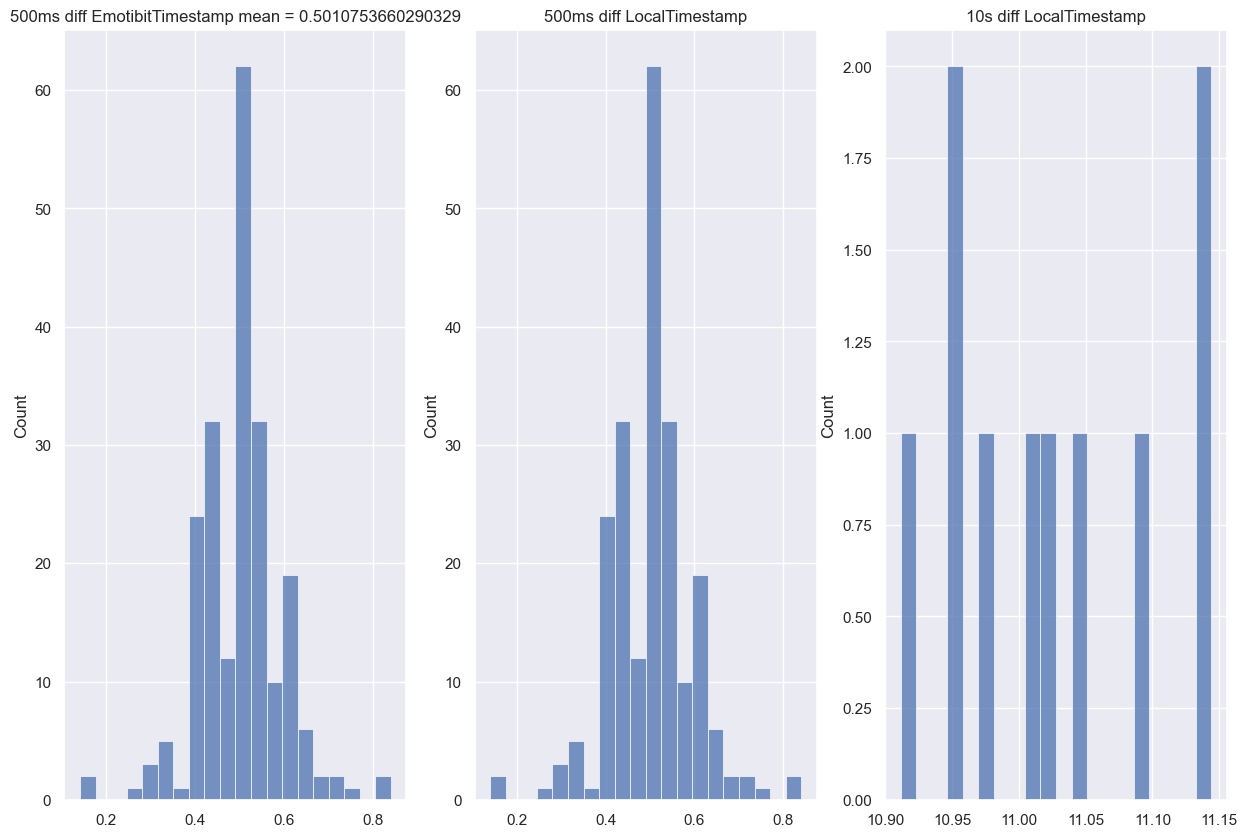

In [55]:
fig1,ax1=plt.subplots(1,3,)
sns.histplot(data=difftime1,ax= ax1[0],bins=20)
sns.histplot(data=difftime2,ax= ax1[1],bins=20)
sns.histplot(data=difftime3,ax= ax1[2],bins=20)
fig1.set_figheight(10)
fig1.set_figwidth(15)
ax1[0].set_title('500ms diff EmotibitTimestamp mean = {}'.format(np.mean(difftime1)))
ax1[1].set_title('500ms diff LocalTimestamp')
ax1[2].set_title('10s diff LocalTimestamp')



Text(0.5, 1.0, '10s diff LocalTimestamp')

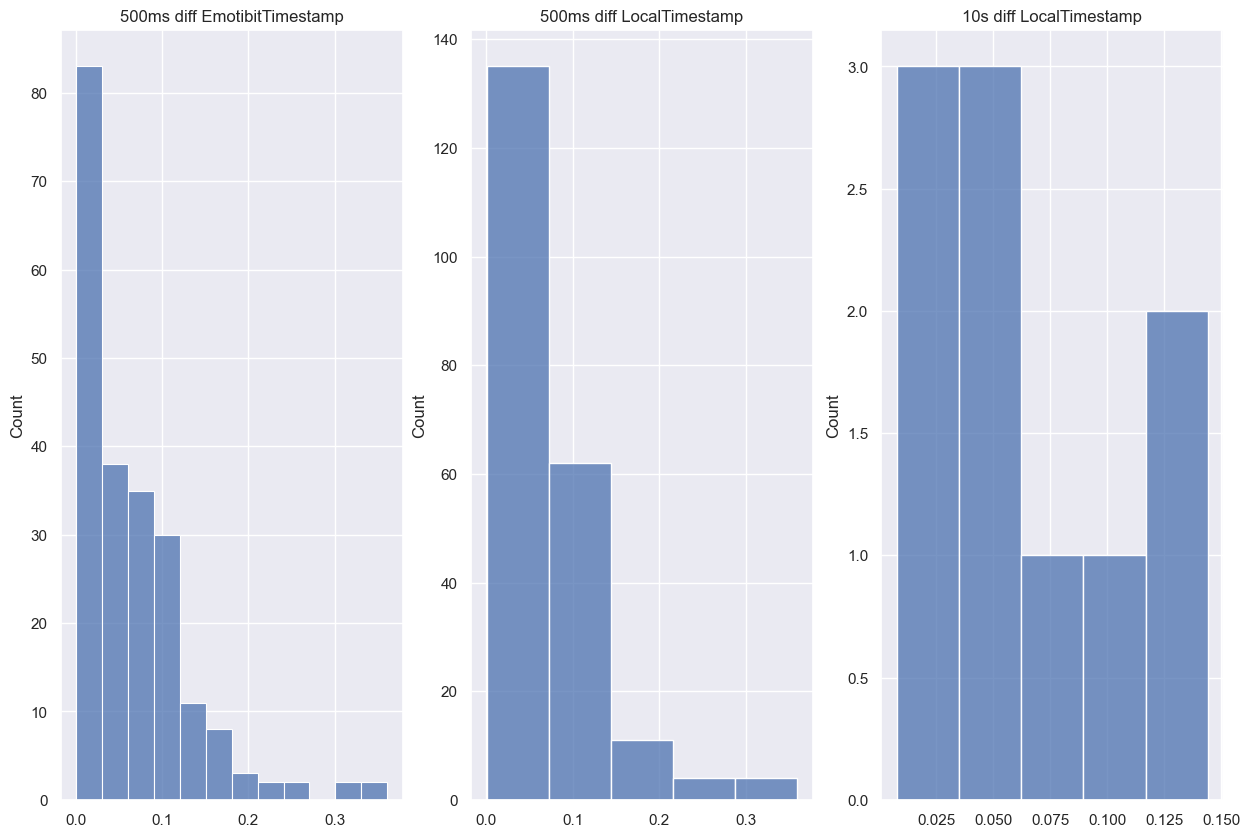

In [56]:
fig1,ax1=plt.subplots(1,3,)
sns.histplot(data=difftime1_diff,ax= ax1[0],bins=5,binwidth=0.03)
sns.histplot(data=difftime2_diff,ax= ax1[1],bins=5)
sns.histplot(data=difftime3_diff,ax= ax1[2],bins=5)
fig1.set_figheight(10)
fig1.set_figwidth(15)
ax1[0].set_title('500ms diff EmotibitTimestamp')
ax1[1].set_title('500ms diff LocalTimestamp')
ax1[2].set_title('10s diff LocalTimestamp')


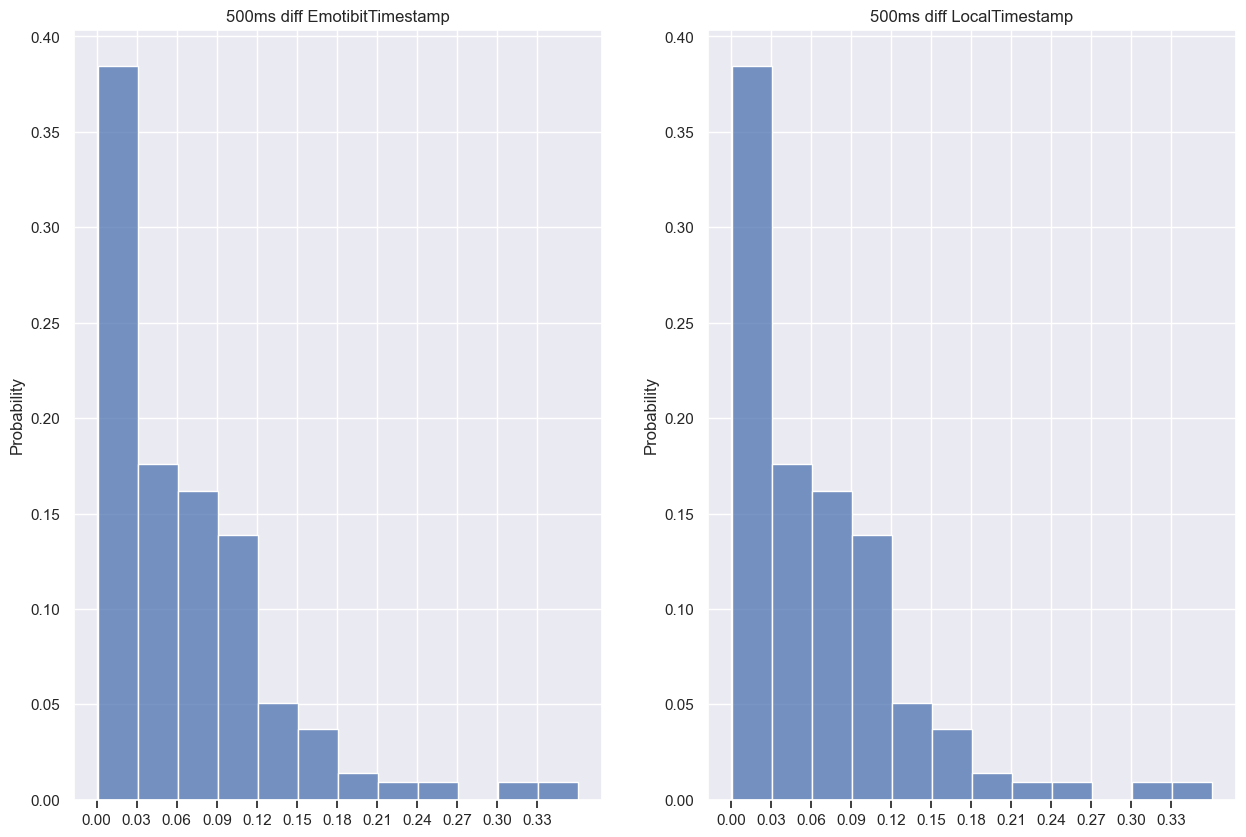

In [57]:
fig1,ax1=plt.subplots(1,2,)
sns.histplot(data=difftime1_diff,ax= ax1[0],bins=5,binwidth=0.03,stat='probability')
sns.histplot(data=difftime2_diff,ax= ax1[1],bins=5,binwidth=0.03,stat='probability')
fig1.set_figheight(10)
fig1.set_figwidth(15)
ax1[0].set_title('500ms diff EmotibitTimestamp')
ax1[1].set_title('500ms diff LocalTimestamp')
ax1[0].xaxis.set_ticks(np.arange(0,max(difftime1_diff),0.03))
ax1[0].xaxis.set_tick_params(reset=True,bottom=True,top=False)
ax1[1].xaxis.set_ticks(np.arange(0,max(difftime2_diff),0.03))
ax1[1].xaxis.set_tick_params(reset=True,bottom=True,top=False)

Check signal latency streamed in LSL. 
The latency of the digital signal streamed into LSL is almost perfect.
In this example the signal was programmed with a latency of 500ms.

Marker "sync_event" @ 1392206.05s
Marker "sync_event" @ 1392206.55s
Marker "sync_event" @ 1392207.06s
Marker "sync_event" @ 1392207.56s
Marker "sync_event" @ 1392208.06s
Marker "sync_event" @ 1392208.56s
Marker "sync_event" @ 1392209.06s
Marker "sync_event" @ 1392209.56s
Marker "sync_event" @ 1392210.06s
Marker "sync_event" @ 1392210.56s
Marker "sync_event" @ 1392211.06s
Marker "sync_event" @ 1392211.56s
Marker "sync_event" @ 1392212.06s
Marker "sync_event" @ 1392212.56s
Marker "sync_event" @ 1392213.06s
Marker "sync_event" @ 1392213.56s
Marker "sync_event" @ 1392214.06s
Marker "sync_event" @ 1392214.56s
Marker "sync_event" @ 1392215.06s
Marker "sync_event" @ 1392215.56s


Text(0.5005200099886248, 1, 'Mean latency 0.5005200099886248')

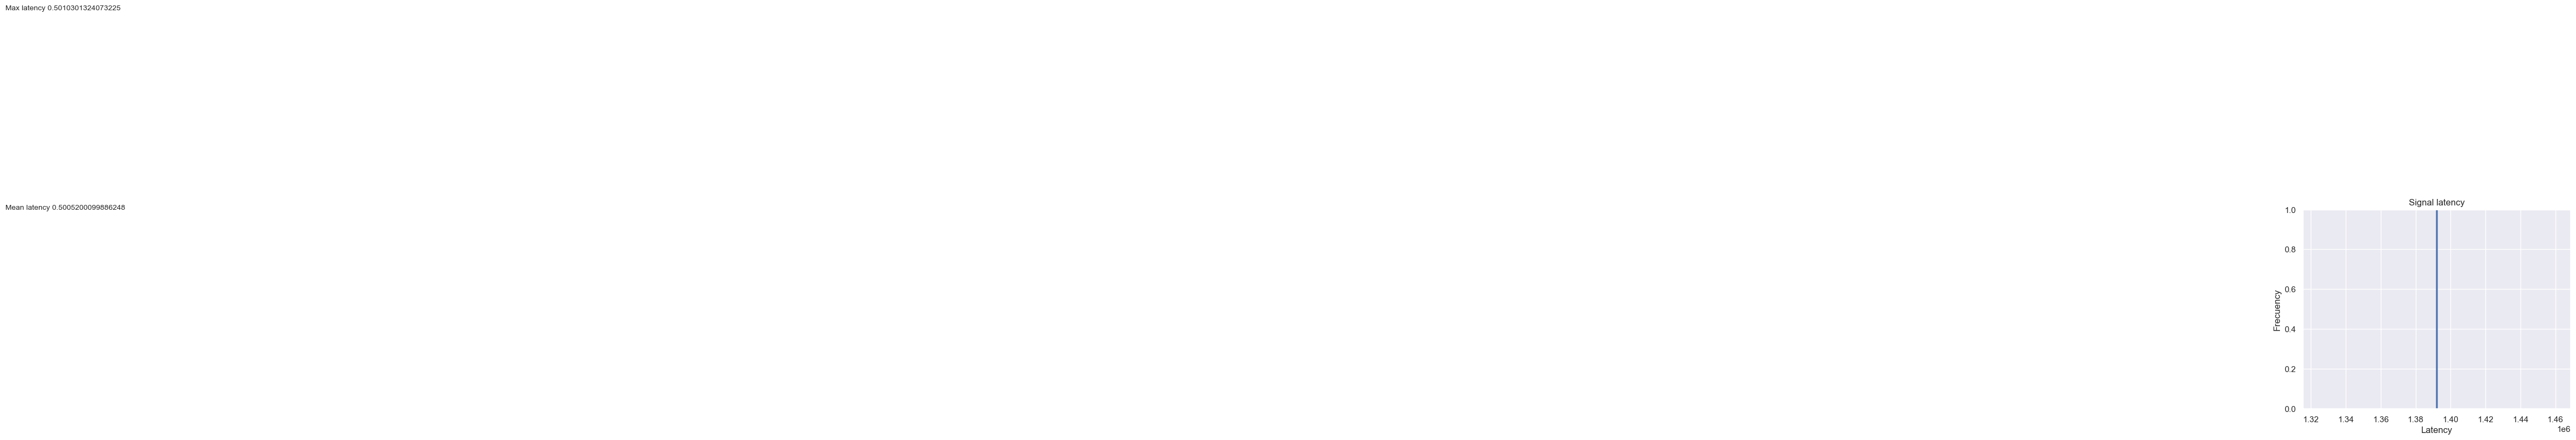

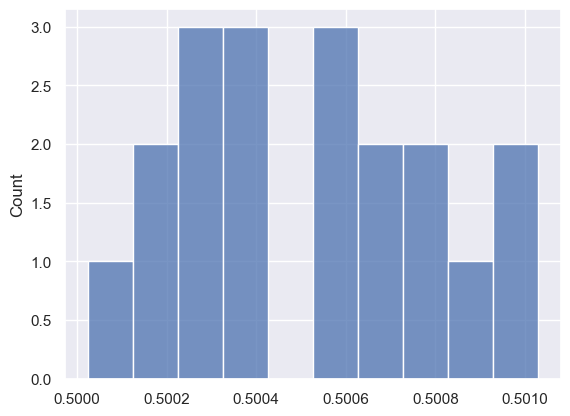

In [58]:
import pyxdf
data, header = pyxdf.load_xdf('sub-P001_sync_try.xdf')
for stream in data:
    y = stream['time_series']
    fig,ax = plt.subplots(1,1)

    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.plot(stream['time_stamps'], y)
    else:
        raise RuntimeError('Unknown stream format')

# %%     Check signal latency
signal_latency=np.diff(stream['time_stamps'])

fig6, ax6 = plt.subplots()
sns.histplot(data=signal_latency,bins=10)
ax.set_xlabel('Latency')
ax.set_ylabel('Frecuency')
ax.set_title('Signal latency')
ax.text(np.mean(signal_latency),2,'Max latency {}'.format(max(signal_latency)),fontsize=10)
ax.text(np.mean(signal_latency),1,'Mean latency {}'.format(np.mean(signal_latency)),fontsize=10)



Are the discrepancies appearing at certain timestamps?


In [59]:
sns.jointplot(x=times1[:-1],y=difftime1,ax=ax8[0])
sns.jointplot(x=times3[:-1],y=difftime3)


NameError: name 'ax8' is not defined